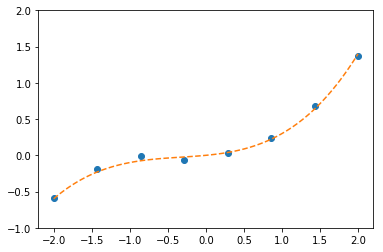

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

train_x = np.linspace(-2,2,8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1,2)
plt.show()

In [2]:
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10,
    ]).T

X = to_matrix(train_z)

theta = np.random.randn(X.shape[1])

def f(x):
    return np.dot(x, theta)

# No regularization

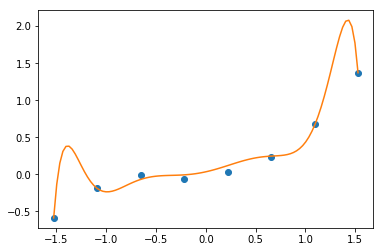

In [3]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) **2)

# 学習率
ETA =1e-4

diff = 1

# 学習率
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    
    
z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

# Use regularization

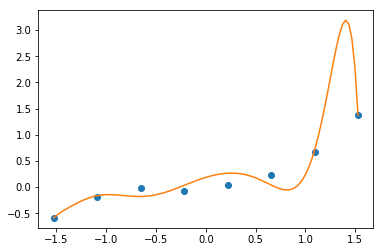

In [4]:
# 正則化なしのパラメータを保存して、再度初期化

theta1 = theta
theta = np.random.randn(X.shape[1])

# 正則化定数
LAMBDA = 1 
diff = 1

# 学習率
error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    
    
z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

# Comparison

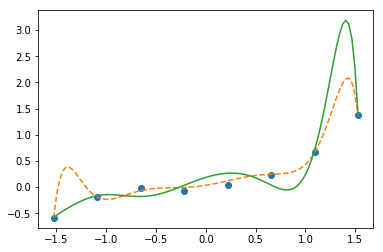

In [5]:
theta2 = theta

plt.plot(train_z, train_y, 'o')

theta = theta1
plt.plot(z, f(to_matrix(z)),linestyle='dashed')

theta = theta2
plt.plot(z,f(to_matrix(z)))

plt.show()

# まとめ

#### L1 正則化の利点は？

L1 normalization を用いたmodelを学習させると、paramter の最適解として、疎 sparseな解が得られます。
sparseとは、具体的に

```
w=(0,5,0,0,2,0,...,0)
```

のように、成分のほとんどが0であるベクトルや行列の状態を表します。

L1 normalization をして0となる成分が、irrelevant feature にあたります。

L1 normalization の使い時は、無関係な次元の数　＞　サンプル数となる場合です。使って、特徴量を減らしましょう。

In [9]:
# wineのデータの読み込み
import pandas as pd
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### L1正則化したロジスティック回帰を学習させます。

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

print('train acc', lr.score(X_train_std, y_train))
print('test acc', lr.score(X_test_std, y_test))

train acc 0.983870967742
test acc 0.981481481481


train, testの精度ともに高く、離れていないことから、L1正則化により、over-fittingが回避できていることがわかります。

In [11]:
# sparseな解の確認
pd.DataFrame(lr.coef_) # 見やすさのためDataFrameに変換
# jupyter notebook で実行してください。

0         1         2         3    4    5         6    7    8   \
0  0.280306  0.000000  0.000000 -0.027947  0.0  0.0  0.710120  0.0  0.0   
1 -0.644045 -0.068789 -0.057221  0.000000  0.0  0.0  0.000000  0.0  0.0   
2  0.000000  0.061556  0.000000  0.000000  0.0  0.0 -0.635657  0.0  0.0   

         9         10        11        12  
0  0.000000  0.000000  0.000000  1.236261  
1 -0.926666  0.060233  0.000000 -0.371003  
2  0.498010 -0.358128 -0.571625  0.000000

In [12]:
pd.DataFrame(lr.coef_).describe()

0         1         2         3    4    5         6    7    8   \
count  3.000000  3.000000  3.000000  3.000000  3.0  3.0  3.000000  3.0  3.0   
mean  -0.121246 -0.002411 -0.019074 -0.009316  0.0  0.0  0.024821  0.0  0.0   
std    0.473953  0.065206  0.033037  0.016135  0.0  0.0  0.673232  0.0  0.0   
min   -0.644045 -0.068789 -0.057221 -0.027947  0.0  0.0 -0.635657  0.0  0.0   
25%   -0.322022 -0.034394 -0.028611 -0.013973  0.0  0.0 -0.317829  0.0  0.0   
50%    0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
75%    0.140153  0.030778  0.000000  0.000000  0.0  0.0  0.355060  0.0  0.0   
max    0.280306  0.061556  0.000000  0.000000  0.0  0.0  0.710120  0.0  0.0   

             9         10        11        12  
count  3.000000  3.000000  3.000000  3.000000  
mean  -0.142886 -0.099298 -0.190542  0.288419  
std    0.723006  0.226167  0.330028  0.841554  
min   -0.926666 -0.358128 -0.571625 -0.371003  
25%   -0.463333 -0.179064 -0.285813 -0.185502  
50%    0.000000  0.000000  0.000000  0.000000  
75%    0.249005  0.030117  0.000000  0.618130  
max    0.498010  0.060233  0.000000  1.236261

#### regularization parameter C を変えると sparsity がどう変わるのか、見てみましょう。
sparsityとは、sparse性のことです。

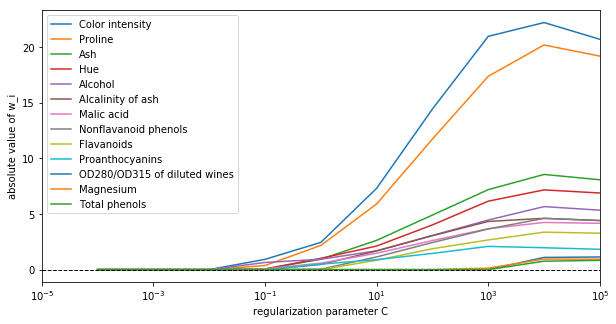

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


weights, params = [], []

for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

w_abs = np.abs(weights)

plt.figure(figsize=(10,5))

feat_labels = df_wine.columns[1:]
# 平均を大きい順にしたときのindex
indices = np.argsort(np.mean(w_abs, axis=0))[::-1]

for i in indices:
    plt.plot(params, w_abs[:, i], label=feat_labels[i])

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlim([10**(-5), 10**5])
plt.ylabel('absolute value of w_i')
plt.xlabel('regularization parameter C')
plt.xscale('log')
plt.legend()
plt.show()

- Cが小さくなる = 正則化効果が大きくなる ほど、sparsity は強くなる
- 各成分の絶対値（Fig3の縦軸）に対し、任意の閾値を設けることにより、feature selection を行います。
絶対値が大きいほど、重要な特徴量なのでした。

### Randome Forest

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=1)
# tree, forestは、standardization 不要
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
forest.feature_importances_

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

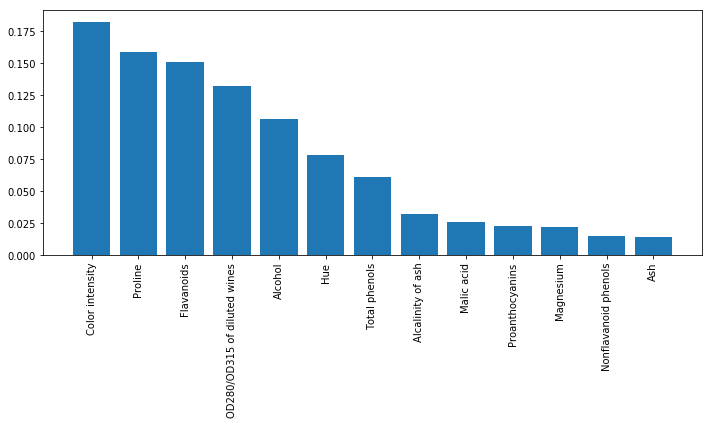

In [17]:
importances = forest.feature_importances_
# 大きい順にしたときのindexたち
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

### Feature Seleciton まとめ
- feature selection
 - 特徴量を選択することにより、次元を減らす
 - 目的
  - over-fitting回避
  - 計算量削減
- 不要な特徴量
 - irrelevant feature
 - redundant feature
- filter
 - 評価指標: 1つの特徴量　に対し計算できる、簡単な数値
  - e.g. 分散
 - 計算コスト: 少
 - 効果: 小
 - 削れる特徴量: irrelevantはよく削れる
 - 学んだ手法・ライブラリ
  - VarianceThreshold
  - SelectKBest
 - その他
  - wrapperの前処理として使う
- wrapper
 - 評価指標: 特徴量の組み合わせ　に対する、モデルのvalidation performance
  - e.g LogisticRegression, SVMのaccuracy
 - 計算コスト: 大
 - 効果: 大
 - 削れる特徴量: redundantも
 - 学んだ手法・ライブラリ
  - RFE(全探索)
  - SBS(greedy backward search)
 - その他
  - 効率のいい探索アルゴリズム
  - データが少ないとover-fittingしやすい
- embedded
  - 評価指標: model内の評価指標
   - L1: 解の各成分の絶対値
   - random forest: information gain
  - 計算コスト: 中
  - 効果: 中
  - 学んだ手法・ライブラリ
   - L1 normalization
   - RandomForest